In [6]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np

click = pd.read_excel("Clickstream.xlsx")
attr = click.values
purchase = click['purchase'] ==1
purchase_data = click[purchase]
non_purchase = click['purchase'] ==0
non_purchase_data = click[non_purchase]
purch_percent = float(len(purchase_data)) / len(click)
non_purch_percent = float(len(non_purchase_data)) / len(click)
print("Click data str. no. of rows, no. of cols : Purchase Data {}, Non_purchase Data{}".format(purchase_data.shape,non_purchase_data.shape))
print("Percent of clicks resulting in purchase:{}, non_purchase{}".format('%.8f' % purch_percent,'%.8f' % non_purch_percent))


Click data str. no. of rows, no. of cols : Purchase Data (7534, 20), Non_purchase Data(398128, 20)


'Percent of clicks resulting in purchase:0.018572111758064596, non_purchase0.9814278882419354'

In [14]:
final_purch = 10000 * purch_percent
final_non_purch = 10000 * non_purch_percent
#print final_purch
#print final_non_purch
purchase_final = purchase_data.sample(n=186)
non_purchase_final = non_purchase_data.sample(n=9814)
final = click.sample(n=10000)
non_purchase1 = final['purchase'] ==0
non_purchase_data1 = final[non_purchase1]
#print non_purchase_data1.shape
purchase1 = final['purchase'] ==1
purchase_data1 = final[purchase1]
#print purchase_data1.shape
purch_percent1 = float(len(purchase_data1)) / len(final)
#print '%.8f' % purch_percent1
non_purch_percent1 = float(len(non_purchase_data1)) / len(final)
#print '%.8f' % non_purch_percent1
final_click = purchase_final.append(non_purchase_final)
#print final_click
final_random_click = final_click.sample(n=10000)
#print final_random_click
writer = ExcelWriter('ClickStream_C3.xlsx',engine='openpyxl')
final_random_click.to_excel(writer,'Sheet1',index=False)
writer.save()
click_final = pd.read_excel("ClickStream_C3.xlsx")
click_final.head()
click_final.shape
final_random_click.to_csv("Click_Sample.csv")
print("Taking sample size as 10000 rows , we keep same ratio of purchase to non-purchase as original data,\n No. of rows with final purchase clicks: {}, no. of rows with non-purchase clicks {}".format(final_purch,final_non_purch))
print("Validating the above statement in sampled data with shape of purchase data{}, shape of non_purchase data{}".format(purchase_data1.shape,non_purchase_data1.shape))
print("Validating the percentage in sampled data, percent of purchases:{}, percent of non_purchases:{}".format('%.8f' % purch_percent1,'%.8f' % non_purch_percent1))
print("10000 rows created by appending non_purchase samples with purchase samples\n{} ".format(final_click))
print("Above data is sampled using random sampling to come to following data\n{}".format(final_random_click))

Taking sample size as 10000 rows , we keep same ratio of purchase to non-purchase as original data,
 No. of rows with final purchase clicks: 185.72111758064597, no. of rows with non-purchase clicks 9814.278882419354
Validating the above statement in sampled data with shape of purchase data(169, 20), shape of non_purchase data(9831, 20)
Validating the percentage in sampled data, percent of purchases:0.01690000, percent of non_purchases:0.98310000
10000 rows created by appending non_purchase samples with purchase samples
                ip  login_or_not  #page_view  page_view_time_seconds_avg  \
284066  2084597202             1          23                   54.782609   
201284  1899969080             0          11                   39.909091   
39340    989227454             1          12                   99.916667   
202240  1901781402             0           4                   18.750000   
55836   1021308423             1          62                   25.161290   
340062  3072084081 

# Visualization of Data Starts here

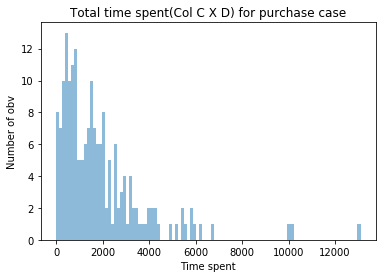

In [29]:
from matplotlib import pyplot as plt
csdf = pd.read_excel("ClickStream_C3.xlsx")
csdf2 = np.array(csdf)
csdf_p = csdf2[(csdf2[:, -1]==1), :]
csdf_np = csdf2[(csdf2[:, -1]==0), :]
num_bins = 100
cp_nt   = csdf_p[:, 2]*csdf_p[:, 3]
cnp_nt  = csdf_np[:, 2]*csdf_np[:, 3]
plt.hist(cp_nt, num_bins, alpha=0.5)
plt.xlabel("Time spent")
plt.ylabel("Number of obv")
plt.title("Total time spent(Col C X D) for purchase case")
plt.show()

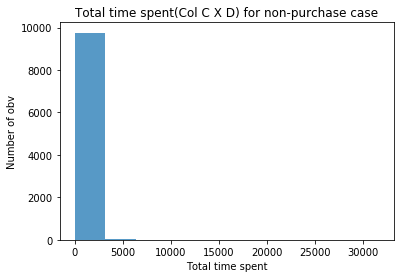

In [30]:
plt.hist(cnp_nt, alpha=0.75)
plt.xlabel("Total time spent")
plt.ylabel("Number of obv")
plt.title("Total time spent(Col C X D) for non-purchase case")
plt.show()

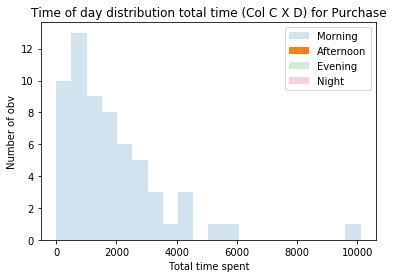

In [31]:
num_bins = 20
plt.hist(csdf_p[(csdf_p[:, -2]==1), 2]*csdf_p[(csdf_p[:, -2]==1), 3], num_bins, alpha=0.2)
plt.hist(csdf_p[(csdf_p[:, -2]==2), 2]*csdf_p[(csdf_p[:, -2]==2), 3], num_bins, alpha=1)
plt.hist(csdf_p[(csdf_p[:, -2]==3), 2]*csdf_p[(csdf_p[:, -2]==3), 3], num_bins, alpha=0.2)
plt.hist(csdf_p[(csdf_p[:, -2]==4), 2]*csdf_p[(csdf_p[:, -2]==4), 3], num_bins, alpha=0.2)
plt.legend(["Morning", "Afternoon", "Evening", "Night"])
plt.xlabel("Total time spent")
plt.ylabel("Number of obv")
plt.title("Time of day distribution total time (Col C X D) for Purchase")
plt.show()

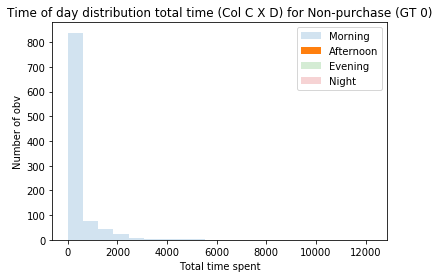

In [32]:
num_bins = 20
csdf_np = csdf_np[(csdf_np[:, 3]>0), :]
plt.hist(csdf_np[(csdf_np[:, -2]==1), 2]*csdf_np[(csdf_np[:, -2]==1), 3], num_bins, alpha=0.2)
plt.hist(csdf_np[(csdf_np[:, -2]==2), 2]*csdf_np[(csdf_np[:, -2]==2), 3], num_bins, alpha=1)
plt.hist(csdf_np[(csdf_np[:, -2]==3), 2]*csdf_np[(csdf_np[:, -2]==3), 3], num_bins, alpha=0.2)
plt.hist(csdf_np[(csdf_np[:, -2]==4), 2]*csdf_np[(csdf_np[:, -2]==4), 3], num_bins, alpha=0.2)
plt.legend(["Morning", "Afternoon", "Evening", "Night"])
plt.xlabel("Total time spent")
plt.ylabel("Number of obv")
plt.title("Time of day distribution total time (Col C X D) for Non-purchase (GT 0)")
plt.show()

['ip' 'login_or_not' '#page_view' 'page_view_time_seconds_avg'
 '#page_product_view' 'page_product_time_avg' 'number_searches'
 '#times_check_shoppingcart' 'read_Q&A' 'read_product_definition'
 'e-commerce' 'search engine' 'email' 'advertisement' 'other' 'morning'
 'noon (11:30 - 2pm)' 'afternoon' 'evening (after 6pm)' 'purchase']


{'whiskers': [<matplotlib.lines.Line2D at 0x11cbaf240>,
 'caps': [<matplotlib.lines.Line2D at 0x11cbafb00>,
 'boxes': [<matplotlib.lines.Line2D at 0x11cbaf0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x11cb9b390>],
 'fliers': [],
 'means': []}

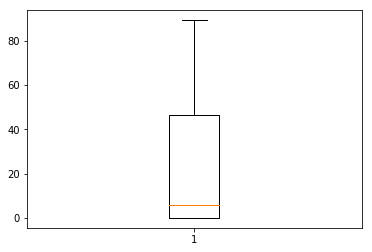

In [33]:
dataset = csdf
dataset.head()
type(dataset)
print(dataset.columns.values)
#assigning the value of purchase status (0 or 1) to a variable
target = (dataset.iloc[:, 12].values)
#remove the column with purchase information
dataset.drop(['purchase'], axis=1)
target_val = np.array(target)
data = np.array(dataset)
select_index = target_val ==1
plt.boxplot(csdf2[select_index,3], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x121253160>,
 'caps': [<matplotlib.lines.Line2D at 0x121253a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b237fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x12125b2b0>],
 'fliers': [],
 'means': []}

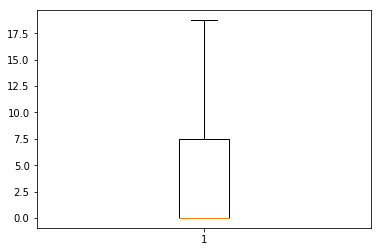

In [34]:
plt.boxplot(data[target_val ==0,3], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x11f2a7b00>,
 'caps': [<matplotlib.lines.Line2D at 0x11f2a5400>,
 'boxes': [<matplotlib.lines.Line2D at 0x11f2a79b0>],
 'medians': [<matplotlib.lines.Line2D at 0x11f2a5c50>],
 'fliers': [],
 'means': []}

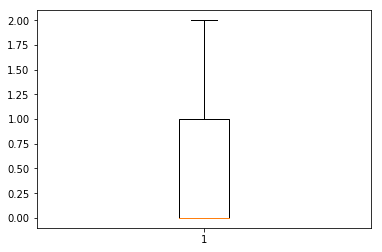

In [35]:
plt.boxplot(data[select_index,4], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x121ad2ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x121ab23c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x121ad2978>],
 'medians': [<matplotlib.lines.Line2D at 0x121ab2c18>],
 'fliers': [],
 'means': []}

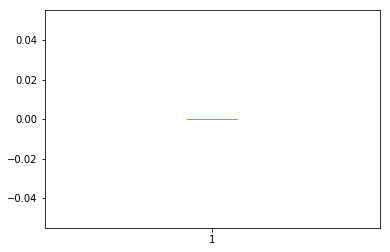

In [36]:
plt.boxplot(data[target_val ==0,4], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x10c4d8390>,
 'caps': [<matplotlib.lines.Line2D at 0x10c4d8c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x10c4d8240>],
 'medians': [<matplotlib.lines.Line2D at 0x10c4ca4e0>],
 'fliers': [],
 'means': []}

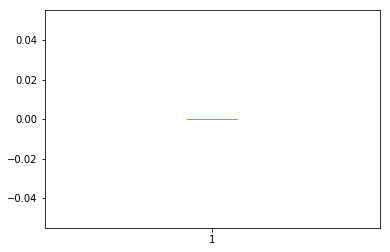

In [37]:
plt.boxplot(data[select_index,5], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x10ec67cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x10ec735f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x10ec67ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x10ec73e48>],
 'fliers': [],
 'means': []}

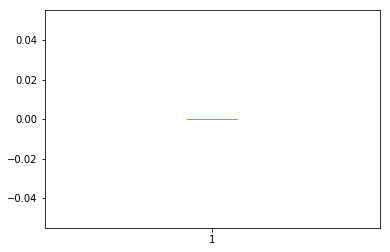

In [38]:
plt.boxplot(data[target_val ==0,5], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x10c338588>,
 'caps': [<matplotlib.lines.Line2D at 0x10c338e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x10c338438>],
 'medians': [<matplotlib.lines.Line2D at 0x10e0856d8>],
 'fliers': [],
 'means': []}

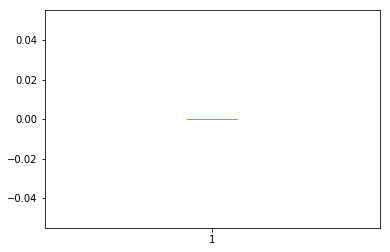

In [39]:
plt.boxplot(data[target_val ==0,6], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x10bcb7da0>,
 'caps': [<matplotlib.lines.Line2D at 0x10bcef6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10bcb7c50>],
 'medians': [<matplotlib.lines.Line2D at 0x10bcefef0>],
 'fliers': [],
 'means': []}

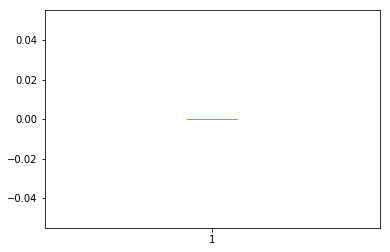

In [40]:
plt.boxplot(data[select_index,7], 0, '')

{'whiskers': [<matplotlib.lines.Line2D at 0x12156d828>,
 'caps': [<matplotlib.lines.Line2D at 0x121587128>,
 'boxes': [<matplotlib.lines.Line2D at 0x12156d6d8>],
 'medians': [<matplotlib.lines.Line2D at 0x121587978>],
 'fliers': [],
 'means': []}

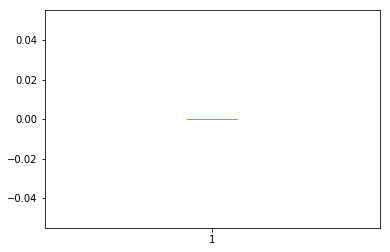

In [41]:
plt.boxplot(data[target_val ==0,7], 0, '')

# Statistical analysis

In [47]:
from scipy import stats
mean_page_view = np.mean(data[:,2])
median_page_view = np.median(data[:,2])
std_dev_page_view = np.std(data[:,2])
stat1 = stats.describe(data[:,2])
stat2 = stats.describe(data[:,3])
stat3 = stats.describe(data[:,4])
stat4 = stats.describe(data[:,5])
stat5 = stats.describe(data[:,6])
stat6 = stats.describe(data[:,7])
print("Mean page views {} \nMedian page views {}\nstandard deviation of page views {}\
\nStats of variables respectively: \
\n#page_view \n{} \npage_view_time_seconds_avg \n{} \n#page_product_view \n{} \npage_product_time_avg \n{} \nnumber_searches \n{}\
\n".format(mean_page_view,median_page_view,std_dev_page_view,stat1,stat2,stat3,stat4,stat5,stat6))

mean_page_view_time = np.mean(data[:,3])
median_page_view_time = np.median(data[:,3])
std_dev_page_view_time = np.std(data[:,3])
mean_prod_view = np.mean(data[:,4])
median_prod_view = np.median(data[:,4])
std_dev_prod_view = np.std(data[:,4])
mean_prod_view_time = np.mean(data[:,5])
median_prod_view_time = np.median(data[:,5])
std_dev_prod_view_time = np.std(data[:,5])
mean_search = np.mean(data[:,6])
median_search = np.median(data[:,6])
std_dev_search = np.std(data[:,6])
mean_chk_cart = np.mean(data[:,7])
median_chk_cart = np.median(data[:,7])
std_dev_chk_cart = np.std(data[:,7])


Mean page views 2.9617 
Median page views 1.0
standard deviation of page views 6.083373497492983
Stats of variables respectively: 
#page_view 
DescribeResult(nobs=10000, minmax=(1.0, 171.0), mean=2.9617, variance=37.011134223422346, skewness=10.268465873869687, kurtosis=180.04363949951568) 
page_view_time_seconds_avg 
DescribeResult(nobs=10000, minmax=(0.0, 2708.8), mean=20.825055621661498, variance=5300.373667815421, skewness=9.476363170785717, kurtosis=213.10719869327912) 
#page_product_view 
DescribeResult(nobs=10000, minmax=(0.0, 45.0), mean=0.292, variance=1.7881148114811483, skewness=11.5521346656266, kurtosis=227.2464702180527) 
page_product_time_avg 
DescribeResult(nobs=10000, minmax=(0.0, 1863.0), mean=10.649818671156199, variance=4408.594167386757, skewness=11.286858298072657, kurtosis=179.58041461247785) 
number_searches 
DescribeResult(nobs=10000, minmax=(0.0, 44.0), mean=0.3543, variance=2.098781388138814, skewness=10.356571773088245, kurtosis=183.1648913371519)

